In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

In [54]:
retail = pd.read_csv('./Data/OnlineRetailClean.csv')

#### 날짜 타입 데이터 변환
- 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이
- infer_datetime_format : 적절한 날짜 데이터 타입으로 변형

In [55]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)

In [56]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  int64         
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int64         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


In [50]:
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3


# 매출 확인
- 전체 매출
- 국가별 매출
- 월별 매출
- 요일별 매출
- 시간별 매출

## 1. 전체 매출

In [42]:
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [43]:
def plot_bar(df, xlabel, ylabel, title,color = COLORS[0], figsize=(20,10), rotation=45):
    plot = df.plot(kind='bar',color=color, figsize=figsize)
    plot.set_xlabel(xlabel,fontsize=11)
    plot.set_ylabel(ylabel,fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

## 2.국가별 매출

In [44]:
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

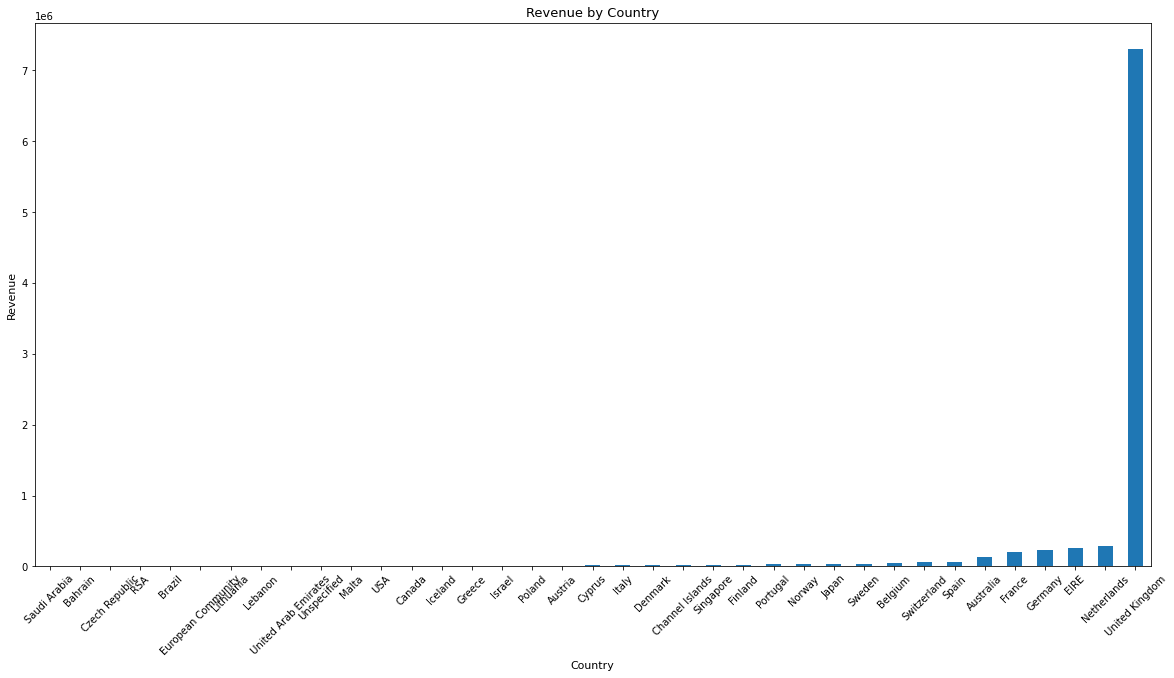

In [45]:
plot_bar(rev_by_countries,'Country','Revenue','Revenue by Country')

## 3. 월별 매출

In [46]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

In [57]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

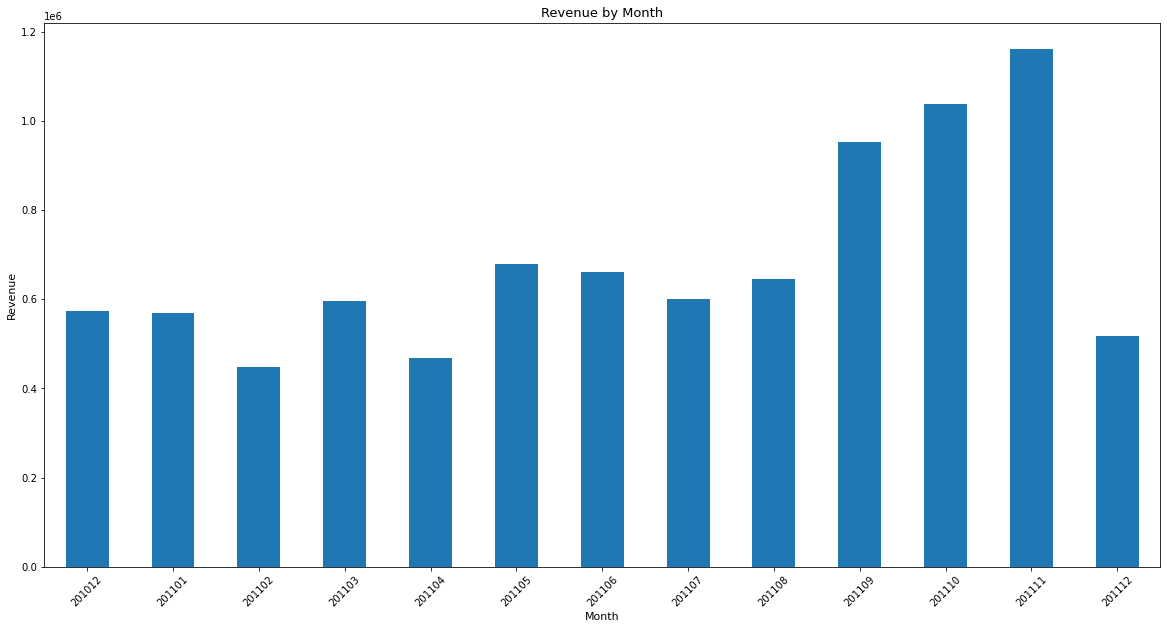

In [58]:
plot_bar(rev_by_month,'Month','Revenue','Revenue by Month')

    - 연말에 판매량이 많아 보이지만 12월에는 몬가 적어보임. 데이터가 없는건지 확인이 필요함.

In [69]:
retail['InvoiceDate'].sort_values()

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
397871   2011-12-09 12:50:00
397870   2011-12-09 12:50:00
397882   2011-12-09 12:50:00
397875   2011-12-09 12:50:00
397883   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

    - 2011년 12월의 데이터는 9일까지 존재해서 상대적으로 값이 작게 나옴

## 4. 요일별 매출

In [70]:
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

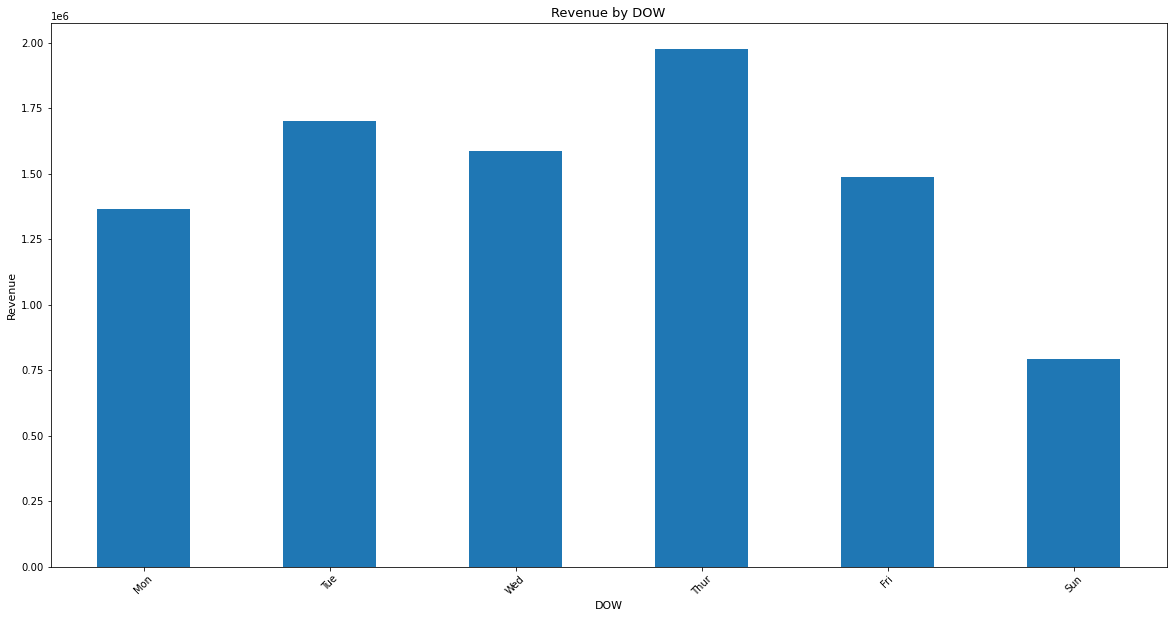

In [72]:
DAY_OF_WEEK = np.array(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow,'DOW','Revenue','Revenue by DOW')

    - 토요일의 데이터가 존재하지않음
    - 주말보다 평일의 매출이 더 높음

## 5. 시간별 매출

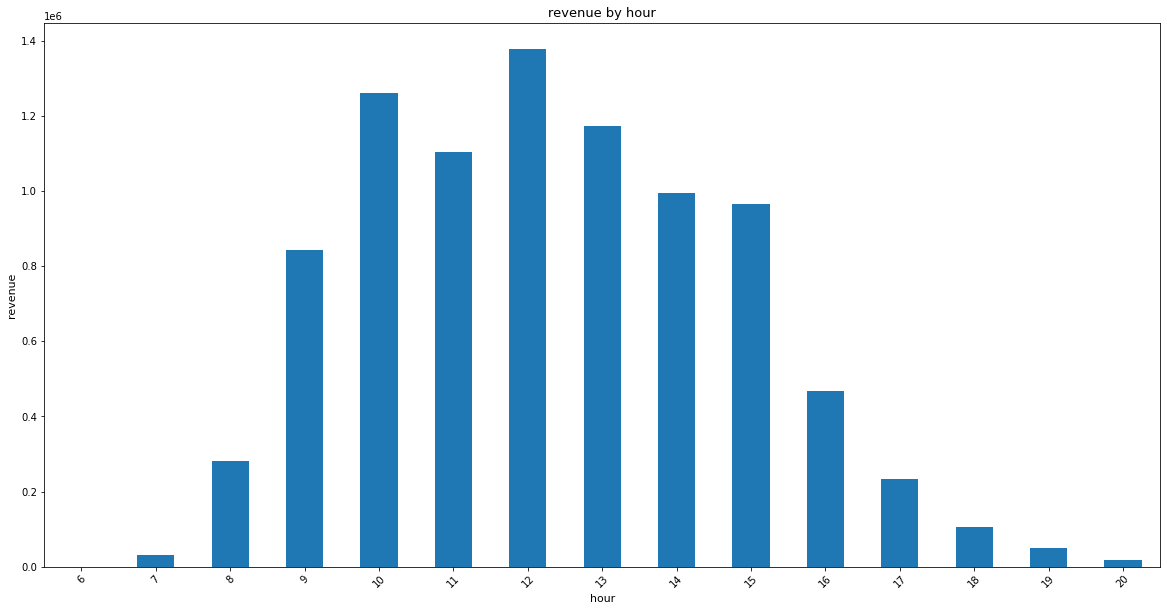

In [73]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour,'hour','revenue','revenue by hour')

- 10시 ~ 15시 까지의 매출이 가장 높음. 이것은 아마 직장인들의 업무시간에 따른 영향인 것으로 보임

## 6. 전체 인사이트
- 11년도의 가장 많은 주문이 발생한 달은 11월이다. (12월의 전체 데이터가 반영되지 않았다.)
    - 11, 12월의 판매량이 압도적인 것으로 보인다.(블랙 프라이데이, 사이버먼데이, 크리스마스)
- 일주일 중 목요일까지는 성장세를 보이다가, 이후로 하락한다(토요일에는 주문이 존재X)
- 7시를 시작으로 주문이 시작되어 12시까지는 증가세, 15시까지는 하락을, 15시 이후로는 급락한다.

## 7. 제품별 metrics

- top 10 판매 제품
- top 10 매출 제품

In [74]:
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [75]:
top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

## 8. top3 아이템의 월별 판매량 추이

In [78]:
top3_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode',extract_month]).sum()[['Quantity','CheckoutPrice']].loc[top3_selling.index]

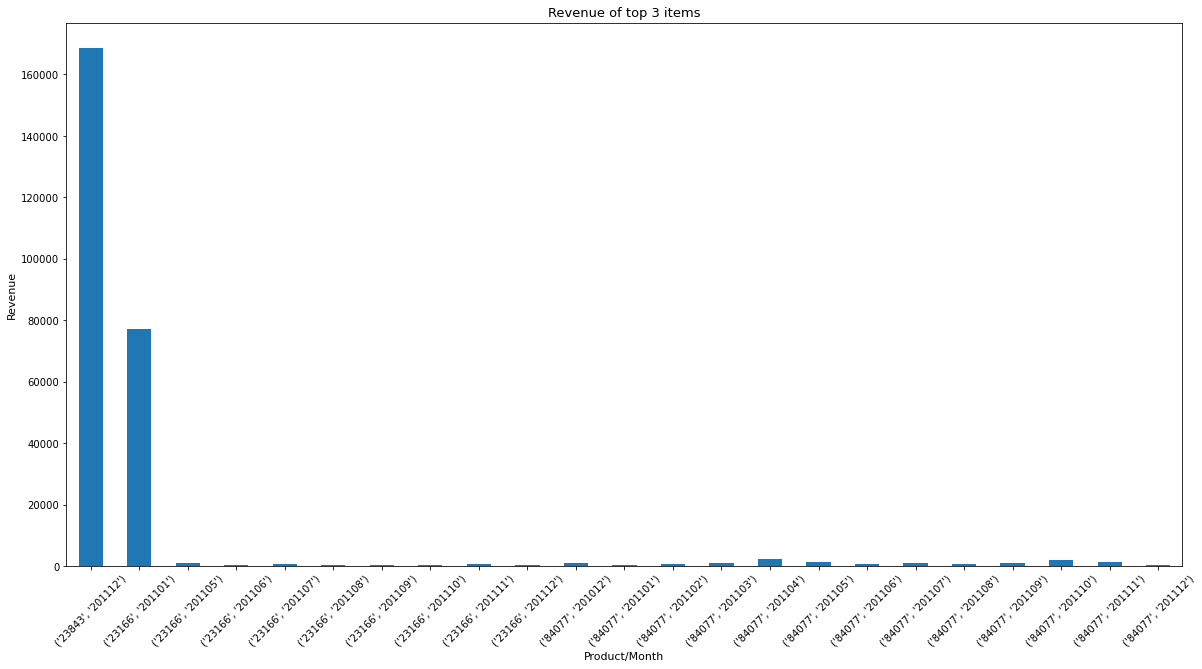

In [79]:
plot_bar(monthly_top3['CheckoutPrice'],'Product/Month','Revenue','Revenue of top 3 items')